In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

In [2]:
import numpy as np
import torch
tkwargs = {"dtype": torch.double,
#            "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
           "device": torch.device("cpu")
          }

from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler
import matplotlib.pyplot as plt

import one_hot_BO_utils as oh
import MAB_BO_utils as mab

In [3]:
# global parameters

d = 5
m = 2*(d+1)
C = 5
BOUNDS = torch.tensor([[-1.0]*d,
                       [3.0]*d]).to(**tkwargs)
BOUNDS_ACQF = torch.tensor([[0.0]*C + [-1.0]*d,
                            [1.0]*C + [3.0]*d]).to(**tkwargs)

N_CANDIDATES = 1
N_TRIALS = 5
N_ITERS = 100
NU = 1.5

# for MAB-BO
N_THOMPSON_SAMPLES = 7000
SAMPLER = 'cholesky'

# for one-hot EI-BO
NUM_MC_SAMPLES = 256
qmc_sampler = SobolQMCNormalSampler(num_samples=NUM_MC_SAMPLES)

### MAB-BO

In [4]:
# BO LOOP

best_values_2 = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = mab.generate_X(m, C, BOUNDS, seed=t).to(**tkwargs)
    train_y = mab.modified_neg_ackley(train_X).to(**tkwargs)
    best_values_2[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
    
        # normalize X 
        train_X_normalized = mab.normalize_with_bounds(train_X, BOUNDS)
#         # standardize y
#         standardizer = Standardize(1)
#         train_y_standardized = standardizer(train_y)[0]

        # initialize model
        models = mab.initialize_models(train_X_normalized, train_y, nu=NU, sampler=SAMPLER)
        
        # get candidates
        new_X = mab.get_candidates(models, d, N_CANDIDATES, N_THOMPSON_SAMPLES, sampler=SAMPLER)
        
        # denormalize candidates
        new_X = mab.denormalize_with_bounds(new_X, BOUNDS)
        
        # evaluate objective
        new_y = mab.modified_neg_ackley(new_X)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values_2[t, i] = best

trial 1/5 | iteration 1/100
picked category: 0 | sampled posterior value = -5.014545501470342
best = -5.6585262806589505
trial 1/5 | iteration 2/100
picked category: 1 | sampled posterior value = -5.240684060045313
best = -5.6585262806589505
trial 1/5 | iteration 3/100
picked category: 0 | sampled posterior value = -5.404171725351345
best = -5.6585262806589505
trial 1/5 | iteration 4/100
picked category: 0 | sampled posterior value = -5.011948772070761
best = -5.6585262806589505
trial 1/5 | iteration 5/100
picked category: 0 | sampled posterior value = -5.567007727803199
best = -4.365797725666418
trial 1/5 | iteration 6/100
picked category: 0 | sampled posterior value = -5.349760365810088
best = -4.237461404794228
trial 1/5 | iteration 7/100
picked category: 0 | sampled posterior value = -5.011298612732238
best = -4.237461404794228
trial 1/5 | iteration 8/100
picked category: 0 | sampled posterior value = -4.886776281535318
best = -4.237461404794228
trial 1/5 | iteration 9/100
picked c

picked category: 1 | sampled posterior value = -3.6340726054052856
best = -2.288714688135077
trial 1/5 | iteration 70/100
picked category: 1 | sampled posterior value = -3.8661378827647574
best = -2.288714688135077
trial 1/5 | iteration 71/100
picked category: 1 | sampled posterior value = -3.933875860104516
best = -2.288714688135077
trial 1/5 | iteration 72/100
picked category: 1 | sampled posterior value = -3.1601613299990583
best = -2.288714688135077
trial 1/5 | iteration 73/100
picked category: 1 | sampled posterior value = -4.320981952720826
best = -2.288714688135077
trial 1/5 | iteration 74/100
picked category: 1 | sampled posterior value = -3.2222128276301776
best = -2.288714688135077
trial 1/5 | iteration 75/100
picked category: 1 | sampled posterior value = -3.9715031090024158
best = -2.288714688135077
trial 1/5 | iteration 76/100
picked category: 1 | sampled posterior value = -4.312415862028843
best = -2.288714688135077
trial 1/5 | iteration 77/100
picked category: 1 | sample

picked category: 0 | sampled posterior value = -3.4423495670567434
best = -2.5737692626514357
trial 2/5 | iteration 38/100
picked category: 0 | sampled posterior value = -3.5565233538436862
best = -2.5737692626514357
trial 2/5 | iteration 39/100
picked category: 0 | sampled posterior value = -3.464316783839024
best = -2.5737692626514357
trial 2/5 | iteration 40/100
picked category: 0 | sampled posterior value = -3.6850076188108565
best = -2.5737692626514357
trial 2/5 | iteration 41/100
picked category: 0 | sampled posterior value = -3.5801543190071907
best = -2.5737692626514357
trial 2/5 | iteration 42/100
picked category: 0 | sampled posterior value = -3.5880146486367477
best = -2.5737692626514357
trial 2/5 | iteration 43/100
picked category: 0 | sampled posterior value = -3.498969819889864
best = -2.5737692626514357
trial 2/5 | iteration 44/100
picked category: 0 | sampled posterior value = -3.4678752018375674
best = -2.5737692626514357
trial 2/5 | iteration 45/100
picked category: 0

picked category: 0 | sampled posterior value = -3.5627860457355505
best = -3.686686645167779
trial 3/5 | iteration 5/100
picked category: 0 | sampled posterior value = -3.8770110755539697
best = -3.686686645167779
trial 3/5 | iteration 6/100
picked category: 0 | sampled posterior value = -3.6967137414247655
best = -3.686686645167779
trial 3/5 | iteration 7/100
picked category: 0 | sampled posterior value = -3.7832123034267737
best = -3.686686645167779
trial 3/5 | iteration 8/100
picked category: 0 | sampled posterior value = -3.809597390653232
best = -3.686686645167779
trial 3/5 | iteration 9/100
picked category: 0 | sampled posterior value = -3.721157279032426
best = -3.686686645167779
trial 3/5 | iteration 10/100
picked category: 0 | sampled posterior value = -3.825181977894446
best = -3.686686645167779
trial 3/5 | iteration 11/100
picked category: 0 | sampled posterior value = -3.604079946407272
best = -3.2411890951007547
trial 3/5 | iteration 12/100
picked category: 0 | sampled pos

picked category: 0 | sampled posterior value = -2.2800726317135296
best = -0.9501641924838862
trial 3/5 | iteration 72/100
picked category: 0 | sampled posterior value = -2.3401070597695606
best = -0.9501641924838862
trial 3/5 | iteration 73/100
picked category: 0 | sampled posterior value = -2.286415749719764
best = -0.9501641924838862
trial 3/5 | iteration 74/100
picked category: 0 | sampled posterior value = -2.4134522423462377
best = -0.9501641924838862
trial 3/5 | iteration 75/100
picked category: 0 | sampled posterior value = -2.425363071555186
best = -0.9501641924838862
trial 3/5 | iteration 76/100
picked category: 0 | sampled posterior value = -2.4799888195729696
best = -0.9501641924838862
trial 3/5 | iteration 77/100
picked category: 0 | sampled posterior value = -2.326852724706853
best = -0.9501641924838862
trial 3/5 | iteration 78/100
picked category: 0 | sampled posterior value = -2.242026135262683
best = -0.9501641924838862
trial 3/5 | iteration 79/100
picked category: 0 |

picked category: 1 | sampled posterior value = -3.6261584318605595
best = -2.3183195787963737
trial 4/5 | iteration 39/100
picked category: 0 | sampled posterior value = -3.8263037004979736
best = -2.3183195787963737
trial 4/5 | iteration 40/100
picked category: 1 | sampled posterior value = -3.2726185132407473
best = -2.3183195787963737
trial 4/5 | iteration 41/100
picked category: 1 | sampled posterior value = -3.6826070177299095
best = -2.3183195787963737
trial 4/5 | iteration 42/100
picked category: 0 | sampled posterior value = -3.658194432840828
best = -2.3183195787963737
trial 4/5 | iteration 43/100
picked category: 1 | sampled posterior value = -3.4700972526865024
best = -2.3183195787963737
trial 4/5 | iteration 44/100
picked category: 1 | sampled posterior value = -3.515200800428733
best = -2.3183195787963737
trial 4/5 | iteration 45/100
picked category: 0 | sampled posterior value = -4.114188998535573
best = -2.3183195787963737
trial 4/5 | iteration 46/100
picked category: 1 

picked category: 0 | sampled posterior value = -4.143524331128059
best = -3.901648036347187
trial 5/5 | iteration 6/100
picked category: 0 | sampled posterior value = -3.686658183165804
best = -3.901648036347187
trial 5/5 | iteration 7/100
picked category: 0 | sampled posterior value = -4.002940917200139
best = -3.901648036347187
trial 5/5 | iteration 8/100
picked category: 0 | sampled posterior value = -3.855489182957198
best = -3.901648036347187
trial 5/5 | iteration 9/100
picked category: 0 | sampled posterior value = -4.193504222992653
best = -3.8330981019305104
trial 5/5 | iteration 10/100
picked category: 0 | sampled posterior value = -4.071489409489646
best = -3.8330981019305104
trial 5/5 | iteration 11/100
picked category: 0 | sampled posterior value = -3.983464607482275
best = -3.8330981019305104
trial 5/5 | iteration 12/100
picked category: 0 | sampled posterior value = -3.814595473378491
best = -3.7570458379911753
trial 5/5 | iteration 13/100
picked category: 0 | sampled pos

picked category: 0 | sampled posterior value = -3.8465929703033486
best = -2.8144662206162363
trial 5/5 | iteration 74/100
picked category: 0 | sampled posterior value = -3.915895100801177
best = -2.8144662206162363
trial 5/5 | iteration 75/100
picked category: 0 | sampled posterior value = -4.159126252739781
best = -2.8144662206162363
trial 5/5 | iteration 76/100
picked category: 0 | sampled posterior value = -3.861920750540508
best = -2.8144662206162363
trial 5/5 | iteration 77/100
picked category: 0 | sampled posterior value = -4.03262580100922
best = -2.8144662206162363
trial 5/5 | iteration 78/100
picked category: 0 | sampled posterior value = -3.92453837662618
best = -2.8144662206162363
trial 5/5 | iteration 79/100
picked category: 0 | sampled posterior value = -3.907909140447939
best = -2.8144662206162363
trial 5/5 | iteration 80/100
picked category: 0 | sampled posterior value = -3.9433048045688692
best = -2.8144662206162363
trial 5/5 | iteration 81/100
picked category: 0 | sam

### One-hot

In [5]:
# BO LOOP

best_values = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = oh.generate_X(m, C, BOUNDS, seed=t).to(**tkwargs)
    train_y = oh.modified_neg_ackley(train_X, C).to(**tkwargs)
    best_values[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
        
        new_X = []
        
        for j in range(N_CANDIDATES):
            
            # set X_pending
            if len(new_X) > 0:
                X_pending = torch.cat(new_X, dim=0)
            else:
                X_pending = None
        
            # normalize X
            train_X_normalized = oh.normalize_with_bounds(train_X, C, BOUNDS)
        
            # initialize model
            model = oh.initialize_models(train_X_normalized, train_y, nu=NU)
            
            # define acqf
            acqf = qExpectedImprovement(model=model, 
                                        best_f=train_y.max(),
                                        sampler=qmc_sampler,
                                        X_pending=X_pending)
        
            # get candidates
            X_picked = oh.get_candidate(acqf, BOUNDS_ACQF, C)
            new_X.append(X_picked)
            
        new_X = torch.cat(new_X, dim=0).to(**tkwargs)
        
        # denormalize candidates
        new_X = oh.denormalize_with_bounds(new_X, C, BOUNDS)
        
        # evaluate objective
        new_y = oh.modified_neg_ackley(new_X, C).to(**tkwargs)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values[t, i] = best

trial 1/5 | iteration 1/100
best = -5.6585262806589505
trial 1/5 | iteration 2/100
best = -5.6585262806589505
trial 1/5 | iteration 3/100
best = -5.6585262806589505
trial 1/5 | iteration 4/100
best = -5.6585262806589505
trial 1/5 | iteration 5/100
best = -5.6585262806589505
trial 1/5 | iteration 6/100
best = -5.6585262806589505
trial 1/5 | iteration 7/100
best = -5.6585262806589505
trial 1/5 | iteration 8/100
best = -3.881826369604973
trial 1/5 | iteration 9/100
best = -3.881826369604973
trial 1/5 | iteration 10/100
best = -3.881826369604973
trial 1/5 | iteration 11/100
best = -3.881826369604973
trial 1/5 | iteration 12/100
best = -3.881826369604973
trial 1/5 | iteration 13/100
best = -3.881826369604973
trial 1/5 | iteration 14/100
best = -3.881826369604973
trial 1/5 | iteration 15/100
best = -3.881826369604973
trial 1/5 | iteration 16/100
best = -3.881826369604973
trial 1/5 | iteration 17/100
best = -3.881826369604973
trial 1/5 | iteration 18/100
best = -3.881826369604973
trial 1/5 | 

best = -3.3938920453452757
trial 2/5 | iteration 50/100
best = -3.3938920453452757
trial 2/5 | iteration 51/100
best = -3.3938920453452757
trial 2/5 | iteration 52/100
best = -3.3938920453452757
trial 2/5 | iteration 53/100
best = -3.3938920453452757
trial 2/5 | iteration 54/100
best = -3.3938920453452757
trial 2/5 | iteration 55/100
best = -3.3938920453452757
trial 2/5 | iteration 56/100
best = -3.3938920453452757
trial 2/5 | iteration 57/100
best = -3.3938920453452757
trial 2/5 | iteration 58/100
best = -3.3938920453452757
trial 2/5 | iteration 59/100
best = -3.3938920453452757
trial 2/5 | iteration 60/100
best = -3.3938920453452757
trial 2/5 | iteration 61/100
best = -3.3938920453452757
trial 2/5 | iteration 62/100
best = -3.3938920453452757
trial 2/5 | iteration 63/100
best = -3.3938920453452757
trial 2/5 | iteration 64/100
best = -3.3938920453452757
trial 2/5 | iteration 65/100
best = -3.3938920453452757
trial 2/5 | iteration 66/100
best = -3.3938920453452757
trial 2/5 | iteration

best = -2.9748403039308653
trial 3/5 | iteration 97/100
best = -2.9748403039308653
trial 3/5 | iteration 98/100
best = -2.9748403039308653
trial 3/5 | iteration 99/100
best = -2.9748403039308653
trial 3/5 | iteration 100/100
best = -2.9748403039308653
trial 4/5 | iteration 1/100
best = -4.333852725748674
trial 4/5 | iteration 2/100
best = -4.333852725748674
trial 4/5 | iteration 3/100
best = -4.333852725748674
trial 4/5 | iteration 4/100
best = -3.6639553079159417
trial 4/5 | iteration 5/100
best = -3.6639553079159417
trial 4/5 | iteration 6/100
best = -3.6639553079159417
trial 4/5 | iteration 7/100
best = -3.6639553079159417
trial 4/5 | iteration 8/100
best = -3.6639553079159417
trial 4/5 | iteration 9/100
best = -3.6639553079159417
trial 4/5 | iteration 10/100
best = -3.6639553079159417
trial 4/5 | iteration 11/100
best = -3.6639553079159417
trial 4/5 | iteration 12/100
best = -3.6639553079159417
trial 4/5 | iteration 13/100
best = -3.6639553079159417
trial 4/5 | iteration 14/100
bes

best = -3.8956927211891785
trial 5/5 | iteration 44/100
best = -3.8956927211891785
trial 5/5 | iteration 45/100
best = -3.8956927211891785
trial 5/5 | iteration 46/100
best = -3.8956927211891785
trial 5/5 | iteration 47/100
best = -3.8956927211891785
trial 5/5 | iteration 48/100
best = -3.8956927211891785
trial 5/5 | iteration 49/100
best = -3.8956927211891785
trial 5/5 | iteration 50/100
best = -3.8956927211891785
trial 5/5 | iteration 51/100
best = -3.8956927211891785
trial 5/5 | iteration 52/100
best = -3.8956927211891785
trial 5/5 | iteration 53/100
best = -3.8956927211891785
trial 5/5 | iteration 54/100
best = -3.8956927211891785
trial 5/5 | iteration 55/100
best = -3.8956927211891785
trial 5/5 | iteration 56/100
best = -3.8956927211891785
trial 5/5 | iteration 57/100
best = -3.8956927211891785
trial 5/5 | iteration 58/100
best = -3.8956927211891785
trial 5/5 | iteration 59/100
best = -3.8956927211891785
trial 5/5 | iteration 60/100
best = -3.8956927211891785
trial 5/5 | iteration

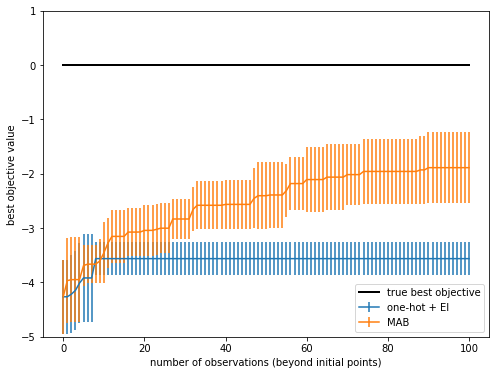

In [6]:
# plot results

def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)


GLOBAL_MAXIMUM = 0.0


obs = np.arange(N_ITERS + 1) * N_CANDIDATES
y1 = np.asarray(best_values.to('cpu'))
y2 = np.asarray(best_values_2.to('cpu'))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.errorbar(obs, y1.mean(axis=0), yerr=ci(y1), label="one-hot + EI", linewidth=1.5)
ax.errorbar(obs, y2.mean(axis=0), yerr=ci(y2), label="MAB", linewidth=1.5)
plt.plot([0, N_ITERS * N_CANDIDATES], [GLOBAL_MAXIMUM] * 2, 'k', label="true best objective", linewidth=2)
ax.set_ylim(bottom=-5, top=1)
ax.set(xlabel='number of observations (beyond initial points)', ylabel='best objective value')
ax.legend(loc="lower right")